# Heading System Design

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.style.use("seaborn")

## True Heading

We need to create our own true heading signals. Reducing it to mathematics as a signal in time. Then we know it is an injective one-to-one function. We can test for a step input, ramp input, and any other standard injective functions. We can also cause several sorts of different source functions. The question is what should be the control architecture for this. Maybe this bit should be MATLAB programmed. Why do one test individually rather than several systems at the same time. 

## Magnetic Compass

> A magnetic compass has a mass (compass needle) that is sprung (magnetic attraction to north) and has some damping (in the needle bearing or with fluid around the needle). Its behaviour is modelled as a second order system. The input to our system is true heading
and the output will be the indicated heading. Remember, in a real system we don’t know what the true heading is, we only see the heading indicated by the sensor: one advantage of simulations over experiment is that we can often observe variables that are
unavailable to us in the real world. You should note that this model of the compass only describes one degree of freedom (rotation in 1 axis) and is highly simplified for this
coursework!

#### Requirements

> S4.1 Construct a model of a magnetic compass. Represent the compass as a second order system with unity sensitivity, rise time 0.4s and settling time 18s. The input to your compass model will be true heading and the output will be the heading indicated by the compass needle.
>
> S4.2 Produce a Bode plot (gain and phase frequency response) of the compass and use this to identify the useable frequency range of this sensor

So that is in general the model of the system. Seeing our listed requirements:

* Rise time: 0.4s
* Settling Time: 18s
* Input: True Heading
* Output: Indicated Heading

#### Theory

We can simplify this as a simple discrete spring-damped-mass using this diagram:

![img](img/spring_mass_damper_system.png)

Note this follows these transfer function principles:
$ {\displaystyle {\ddot {x}}+2\zeta \omega _{n}{\dot {x}}+\omega _{n}^{2}x=u} $

And these principles
${\displaystyle \omega _{n}={\sqrt {\frac {k}{m}}};\quad \zeta ={\frac {c}{2m\omega _{n}}};\quad u={\frac {F_{external}}{m}}}$

> The step input, i.e. from 0 to 1 at t=0, is a
useful signal to characterise systems. The
characteristics rise time, settling time and
sensitivity describe how a second order
system responds to a unit step input.
The sensitivity is the level to which the
output eventually settles; the rise time of
a system is the time taken to go from 10%
to 90% of that level; and the settling time
is the time after which the output
remains within ±5% of the steady state
level. See fig. 6 for graphical explanations.

Note that in order to get the rise and fall times, the approximation functions depend on the damping and state of the system. So ideally, we should ideally derive the parameters required. The equations that describe the rise time and settingling time accordingly depend on the assumptions of that.

#### Application

* $t_{rise} = 0.4$
* $t_{settling} = 18$
* $k_{sensitivity} = 1$

Input
* Step signal

We are given some approximations for the time domain characteristics that we could use (justify applicability?):

> If the damping is low, i.e. $\zeta << 1$, then we can approximate the time
domain characteristics as
>
> \begin{equation}
t_{rise} \approx \frac{1.02}{w_n}
\end{equation}
>
> and 
>
> \begin{equation}
t_{settling} \approx \frac{3}{w_n\zeta}
\end{equation}

What if the damping is larger? Although the quote mentions: "some daming", but how much is not that much. Note that in order to get the correct frequency range.

We could rewrite these as:

$$w_n \approx \frac{1.02}{t_{rise}}$$

and 

$$\zeta \approx \frac{3}{w_n t_{settling}} 
\approx \frac{3 t_{rise}}{1.02 t_{settling}}
\approx 2.94 \frac{t_{rise}}{t_{settling}} $$

Note that this means that an undamped, oscillatory system is likely to result? We want to minimize rise time but reach a steady state value.

Note that if $w_n$ is natural frequency and also $2\pi f$ then there is a factor of $2\pi$ that must be accounted for when discussing the soltuions.

Second Order Transfer Function
\begin{equation}
c\ddot{y}(t) + b\dot{y}(t) + ay(t) = e\dot{u}(t) + fu(t)
\end{equation}

Solving via Laplace:
\begin{equation}
\frac{Y(s)}{U(s)} = \frac{es + f}{cs^2 + bs + a}
\end{equation}

Note we can equate this to a standard second order system:

\begin{equation}
\frac{w^{2}_{n}}{s^2 + 2 \zeta w_n s + w^{2}_{n}} 
\end{equation}

Note $w_n$ is the natural frequency.

We can then generically say:

\begin{equation}
\frac{Y(s)}{U(s)} = \frac{es + f}{cs^2 + bs + a} = \frac{w^{2}_{n}}{s^2 + 2 \zeta w_n s + w^{2}_{n}} 
\end{equation}

Note that if we write the denominators and numerators in matrix form, then the length of the array determines the order of that specific expression.

## Gyro Compass

> The gyro-compass is more complex to model, so we will build up a representative model from what we know of its behaviour.
An ideal gyro would remain spinning in the axis in which it was initialised, irrespective of the movement of the support gimbal. However since the support bearing will suffer some
friction, changes in the heading of the aircraft will tend to introduce errors gyro.

#### Requirements
> S4.3 Construct a model of a gyro compass. Represent the gyro-compass as an
ideal sensor with error modelled as integrated white noise with an offset, e.g. Fig.
8.
>
> S4.4 Sketch the frequency spectrum of the output of the random number block,
and the gain frequency response of an integrator, hence sketch the frequency spectrum of the error signal added to the true heading.
>
> S4.5 Suggest the useable frequency range of the gyro compass – note it is not possible to quantify in the same way as the magnetic compass.

Note that we're inputting into the system the rawHeading, and are adding the noise from gyro errors.

#### Theory

> Gyro Law:
\begin{equation}
T = h\dot{\theta_m}
\end{equation}
> Implies that due to the large value of the angular momentum, $h$,
of the spinning mass, the disturbance torque $T$ (caused by gimbal bearing friction as the gyro outer frame moves with the aircraft), leads only to small rotation rates of the gyro
mass spin axis, $\dot{\theta_m}$

Potentially described by this diagram:

![img](img/gyro_diagram.gif)

> Ideally the gyro axis would not rotate at all, thereby providing a constant directional reference, so the angle $\theta_m$ represents the gyro measurement error. To model this error, we integrate the equation, giving $\theta_m = \frac{1}{h} \int{T} dt$ (assuming that the gyro was initialized without error)
>
> If we assume the disturbance torque is caused by aircraft heading changes and by buffeting of the aircraft, and these are random in nature, we can model them with the ‘random number’ Simulink block.
>
> In addition, the gyro will also drift slowly over time, which can be due to the spinning of the earth and the aircrafts velocity, and manufacturing/construction limitations. This is
generally a slower effect in real systems but to capture it here we can add a mean value (offset) to our random number.
> 
> Therefore, modelling the disturbance torque $T$ as a Gaussian random signal, a Simulink model of a gyro would look like that shown in fig. 8. Important: you should set the standard deviation of the random number to 0.1, which gives a reasonable value for h, and set the
mean to ~0.02 which should give you around 1.5o per minute drift

The Laplace and transfer function of this model is equivalent to :
    
\begin{equation}
T = sh\theta_m
\end{equation}

\begin{equation}
\frac{\theta_m}{T} = \frac{1}{sh}
\end{equation}

Assuming this is the function just for the integrator, we can already model the frequency response for it, assuming the initialization offset is 0. We approximate the angular momentum of the spinning mass, h, of the gimbal by instead analysing the expeected response of the gyroscope to input torque. We can't use a bode function since we do not know the value of the h angular momentum of the gimbal mass.

#### Applications

We're pretty much assuming a first order system. 

* Mean = 0.02
* Standard Deviation = 0.1 = $\sigma$, variance = $\sigma^2$ = 0.01

The standard form of a first order system is:

\begin{equation}
\tau \dot{y} + y = ku
\end{equation}

> The differential equation for a first order system (e.g. a system with one energy storage
element) in standard form is where τ is known as the time constant and k is
the sensitivity.
Considering the response of the system to a sinusoidal input, the steady state gain is the
ratio of output magnitude over input magnitude (after any transients have died out). The
bandwidth is determined from a graph of steady state gain against frequency and is
defined as the frequency at which the steady state gain drops to 1/√2 of its ‘passband’
level, i.e. the gain in the region where the graph is flat. The phase response of the system
is defined as the phase shift between the input and output waveforms.The differential equation for a first order system (e.g. a system with one energy storage
element) in standard form is where τ is known as the time constant and k is
the sensitivity.
Considering the response of the system to a sinusoidal input, the steady state gain is the
ratio of output magnitude over input magnitude (after any transients have died out). The
bandwidth is determined from a graph of steady state gain against frequency and is
defined as the frequency at which the steady state gain drops to 1/√2 of its ‘passband’
level, i.e. the gain in the region where the graph is flat. The phase response of the system
is defined as the phase shift between the input and output waveforms.
>
> B3.8 Determine the transfer function of a first order dynamic system with time
constant 0.01s and unity static sensitivity (i.e. sensitivity of 1).
>
>B3.9 Simulate the response of this system model to a sinusoidal input. Obtain
results for several input frequencies in the range 10rad/s to 1000rad/s. Use can
use your data to construct an approximate plot of steady state gain verses
frequency, and of phase response verses frequency. Can you identify the
bandwidth of the system?

We calculate the Laplace form of the system:

\begin{equation}
s\tau y + y = ku
\end{equation}

\begin{equation}
\frac{y}{u} = \frac{k}{s\tau + 1}
\end{equation}


Note that this transfer function applies for a number of inputs and variables. Hence we have a numerator of $k=1$ and denominator \[ $\tau$  1\]

However, for the gyroscope law transfer function with an input heading and output 

## Complimentary Filters

> You have now described the two sensors and have determined some characteristics of each, hopefully you will have found that their negative characteristics do not completely
overlap.
>
> We now need to combine the output of these sensors in a way that produces a better estimate of heading than either one used alone – this is called sensor fusion
> Since we have seen the sensors differ in frequency domain, we are going to weight the
output of each individual sensor according to frequency, thus combining the low
frequency information from one sensor with the high frequency information of the other.
This approach is one of the simplest in sensor fusion and involves complimentary filters
Two filters, $H_1(s)$ and $H_2(s)$ are complementary if $H_1(s) + H_2(s) = 1$ for all s.


#### Requirements
> S4.6 Determine the transfer functions for a pair of complementary first order filters with gain of ‘1’ in the pass band. Choose a suitable cut-off frequency for your filters based on the results of T4.2/T4.5. 

> A low pass filter transfer function in Laplace is:
> 
>\begin{equation}
{\frac  {{\text{Output}}}{{\text{Input}}}}=K{\frac  {1}{\tau s+1}}
\end{equation}
> where s is the Laplace transform variable, τ is the filter time constant, and K is the gain of the filter in the passband.
>
> The break frequency, also called the turnover frequency, corner frequency, or cutoff frequency (in hertz), is determined by the time constant:
> \begin{equation}
f_\mathrm{c} = {1 \over 2 \pi \tau } = {1 \over 2 \pi R C}
\end{equation}
>
> \begin{equation}
\omega_\mathrm{c} = {1 \over \tau} = {1 \over R C}
\end{equation}

Then note that $w_c$ is the 3db value in the MATLAB plot and rearranging is required to get the time constant.

If we know the time constant, and since MATLAB has its frequencies in Radians, we can simply go for $\omega_C$

![img](img/low_pass_filter.png)

How do we numerically model the random integrator?

For the gyro filter we can add a bandpass ideally, although can start with a high pass as:

\begin{equation}
\frac{s}{s + \frac{1}{\tau}}
\end{equation}


If the time constant is the same where the compass cutoff frequency, then we can make them complimentary.

Then note:
\begin{equation}
\frac{s}{s + \frac{1}{\tau}} +  K{\frac  {1}{\tau s+1}}
\end{equation}

Assuming $K=1$ then:

\begin{equation}
1 - \frac{s}{s + \frac{1}{\tau}} = \frac{s + \frac{1}{\tau} - s}{s + \frac{1}{\tau}} = \frac{1}{\tau (s + \frac{1}{\tau})} = {\frac  {1}{\tau s+1}}
\end{equation}

They are complementary.

In [119]:
# Bode Plot
raw_bode_compass = pd.read_csv("analytics/derivations/rawBodeTableCompass.csv")
raw_bode_compass

,magnitudeBodeCompass,phaseBodeCompass,frequenciesSecondOrder
0,1.001588,-0.306064,0.100000
1,1.001899,-0.334743,0.109336
2,1.002599,-0.391719,0.127856
3,1.003557,-0.458511,0.149514
4,1.004871,-0.536881,0.174840
5,1.006673,-0.628952,0.204456
6,1.009147,-0.737303,0.239088
7,1.012550,-0.865110,0.279587
8,1.017240,-1.016350,0.326946
9,1.023725,-1.196108,0.382327


In [121]:
# Nyquist Plot
raw_nyquist_compass = pd.read_csv("analytics/derivations/rawNyquistTableCompass.csv")
raw_nyquist_compass

,Var1,Var2,frequencyNyquistCompass
0,1.000000e+00,0.000000e+00,0.000000e+00
1,1.000000e+00,0.000000e+00,1.000000e-20
2,1.000000e+00,0.000000e+00,1.000000e-19
3,1.000000e+00,0.000000e+00,1.000000e-18
4,1.000000e+00,0.000000e+00,1.000000e-17
5,1.000000e+00,0.000000e+00,5.301843e-17
6,1.000000e+00,0.000000e+00,1.000000e-16
7,1.000000e+00,-2.220446e-16,1.000000e-15
8,1.000000e+00,-3.774758e-15,1.000000e-14
9,1.000000e+00,-3.774758e-14,1.000000e-13


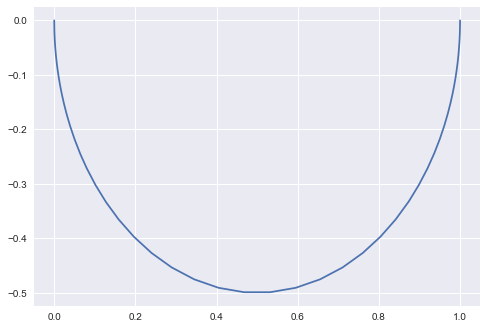

In [124]:
plt.plot(raw_nyquist_compass.Var1, raw_nyquist_compass.Var2)

In [77]:
# Get the correct filtered data points within the error bound
filtered_slope_points_raw = np.genfromtxt("analytics/derivations/filteredDBSecondOrder.csv", delimiter=',')
filtered_slope_points = filtered_slope_points_raw[filtered_slope_points_raw[:,0] > 0]
filtered_slope_points[:, 0]

array([0.1       , 0.10933621, 0.1278565 , 0.14951391, 0.17483984,
       0.20445569, 0.23908812, 0.27958689, 0.32694568, 0.3823265 ,
       0.4470882 , 0.52281978, 0.61137941, 0.71494002, 0.8360426 ,
       0.97765856, 1.        , 1.14326263, 1.28996423])

In [130]:
# Get the error filtered data points within the error bound
error_slope_points_raw = np.genfromtxt("analytics/derivations/badFilteredDBSecondOrder.csv", delimiter=',')
error_slope_points = error_slope_points_raw[error_slope_points_raw[:,0] > 0]
error_slope_points[:, 0]

array([3.49098652, 3.81644304])

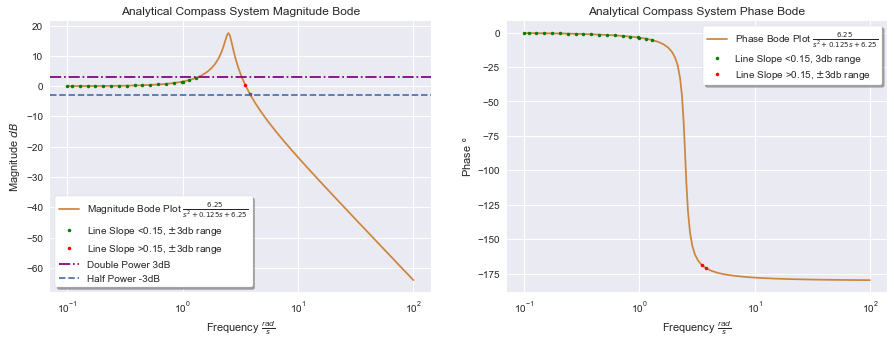

In [137]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
# Magnitude Bode Plot
axes[0].plot(raw_bode_compass.frequenciesSecondOrder, \
         -20*np.log10(1/raw_bode_compass.magnitudeBodeCompass),\
             'peru',\
             label=r'Magnitude Bode Plot $\frac{6.25}{s^2 + 0.125s + 6.25}$')
axes[0].plot(filtered_slope_points[:, 0], filtered_slope_points[:, 1], '.g', label="Line Slope <0.15, $\pm$3db range")
axes[0].plot(error_slope_points[:, 0], error_slope_points[:, 1], '.r', label="Line Slope >0.15, $\pm$3db range")
axes[0].axhline(3, linestyle="-.", color="purple", label="Double Power 3dB")
axes[0].axhline(-3, linestyle="--", label="Half Power -3dB")
axes[0].set_title('Analytical Compass System Magnitude Bode')
axes[0].set_ylabel('Magnitude $dB$')
axes[0].set_xlabel(r'Frequency $\frac{rad}{s}$')
axes[0].set_xscale('log')
axes[0].legend(shadow=True,\
               fancybox=True,\
               facecolor='white',\
               framealpha=1,\
               frameon=True)

# Phase Bode Plot
axes[1].plot(raw_bode_compass.frequenciesSecondOrder, \
             raw_bode_compass.phaseBodeCompass,\
             'peru', \
             label=r'Phase Bode Plot $\frac{6.25}{s^2 + 0.125s + 6.25}$')
axes[1].plot(filtered_slope_points[:, 2], filtered_slope_points[:, 3],\
             '.g',\
             label="Line Slope <0.15, 3db range")
axes[1].plot(error_slope_points[:, 2],\
             error_slope_points[:, 3],\
             '.r',\
             label="Line Slope >0.15, $\pm$3db range")
axes[1].set_title('Analytical Compass System Phase Bode')
axes[1].set_ylabel('Phase $\degree$')
axes[1].set_xlabel(r'Frequency $\frac{rad}{s}$')
axes[1].set_xscale('log')
axes[1].legend(shadow=True,\
               fancybox=True,\
               facecolor='white',\
               framealpha=1,\
               loc="upper right",\
               frameon=True)

plt.savefig("analytics/derivations/compass_bode_plots.png")